In [1]:
import math
import csv 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import path
import scipy as scipy
import scipy.io
import cv2

import os
os.listdir(os.getcwd())

import json as json
import pickle as pickle

from read_roi import read_roi_file
from read_roi import read_roi_zip

from IPython.display import clear_output


In [26]:

date = '20191210'
video_number = 1
roi_number = 1
video_name = 'Video_1.m4v'

# roi_path = "E:/PER2/" + str(date) + "/analysis/RoiSet_vid" + str(roi_number) + "/"
roi_path = "Z:data/Ashley2/PER/" + str(date) + "/analysis/RoiSet_vid" + str(roi_number) + "/"
rois = os.listdir(roi_path)
print(rois)

# jpeg_path = "E:/PER2/" + str(date) + "/analysis/Video_" + str(video_number) + "/"
# jpeg_file_names = os.listdir(jpeg_path)

#video_path = "E:/PER2/" + str(date) + "/" + str(video_name)
video_path = "Z:data/Ashley2/PER/" + str(date) + "/" + str(video_name)
cap = cv2.VideoCapture(video_path)

save_file_name = "Results_video_" + str(video_number) + "_python_m4v.csv"
save_path = "C:/Users/ashsm/Documents/Stanford/PER timing project/Proboscis Extension Videos/" + str(date) + "/" 

# Check if opened successfully
if (cap.isOpened() is False):
    print('Error opening video stream or file for: ' + assayName)
    print("Error opening video stream or file") #, file=f)
    ee = open(assayName + '_errorFile.txt', 'w')
    ee.write('Error opening video stream or file.')
    ee.close()
else:
    print('vid opened successfully') #, file=f)

# how many frames in video?
nFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

['Light.roi', 'PER.roi', 'PER10.roi', 'PER11.roi', 'PER12.roi', 'PER13.roi', 'PER14.roi', 'PER15.roi', 'PER16.roi', 'PER17.roi', 'PER18.roi', 'PER19.roi', 'PER2.roi', 'PER20.roi', 'PER3.roi', 'PER4.roi', 'PER5.roi', 'PER6.roi', 'PER7.roi', 'PER8.roi', 'PER9.roi']
vid opened successfully


In [11]:
## Get ROI dictionaries ###

#read_roi_file puts data into dict in dict
all_roi_info_dict = []
for roi_name in rois:
    roi_file_path = os.path.join(roi_path, roi_name)
    print(roi_file_path)
    roi = read_roi_file(roi_file_path)
    all_roi_info_dict.append(roi)

Z:data/Ashley2/PER/20191210/analysis/RoiSet_vid1/Light.roi
Z:data/Ashley2/PER/20191210/analysis/RoiSet_vid1/PER.roi
Z:data/Ashley2/PER/20191210/analysis/RoiSet_vid1/PER10.roi
Z:data/Ashley2/PER/20191210/analysis/RoiSet_vid1/PER11.roi
Z:data/Ashley2/PER/20191210/analysis/RoiSet_vid1/PER12.roi
Z:data/Ashley2/PER/20191210/analysis/RoiSet_vid1/PER13.roi
Z:data/Ashley2/PER/20191210/analysis/RoiSet_vid1/PER14.roi
Z:data/Ashley2/PER/20191210/analysis/RoiSet_vid1/PER15.roi
Z:data/Ashley2/PER/20191210/analysis/RoiSet_vid1/PER16.roi
Z:data/Ashley2/PER/20191210/analysis/RoiSet_vid1/PER17.roi
Z:data/Ashley2/PER/20191210/analysis/RoiSet_vid1/PER18.roi
Z:data/Ashley2/PER/20191210/analysis/RoiSet_vid1/PER19.roi
Z:data/Ashley2/PER/20191210/analysis/RoiSet_vid1/PER2.roi
Z:data/Ashley2/PER/20191210/analysis/RoiSet_vid1/PER20.roi
Z:data/Ashley2/PER/20191210/analysis/RoiSet_vid1/PER3.roi
Z:data/Ashley2/PER/20191210/analysis/RoiSet_vid1/PER4.roi
Z:data/Ashley2/PER/20191210/analysis/RoiSet_vid1/PER5.roi
Z:d

In [12]:
print((all_roi_info_dict[1].keys()))
print(all_roi_info_dict[1])
print(all_roi_info_dict[0]['Light']['left'])

#get roi names as keys for original dict that has dicts of info
#need to use list to get rid of dict specifier
roi_names_as_keys = []
for i in range(len(all_roi_info_dict)):
    roi_key_name = list(all_roi_info_dict[i].keys())
    roi_names_as_keys.append(roi_key_name[0])
print(roi_names_as_keys)

all_x1 = []
all_y1 = []
all_width = []
all_height = []
all_name = []
all_poly_name = []
all_poly_x = []
all_poly_y = []
all_name_for_header = []

for i in range(len(all_roi_info_dict)):
    if all_roi_info_dict[i][roi_names_as_keys[i]]['type'] == 'rectangle':
        x1 = all_roi_info_dict[i][roi_names_as_keys[i]]['left']
        y1 = all_roi_info_dict[i][roi_names_as_keys[i]]['top']
        height = all_roi_info_dict[i][roi_names_as_keys[i]]['height']
        width = all_roi_info_dict[i][roi_names_as_keys[i]]['width']
#         name = all_roi_info_dict[i][roi_names_as_keys[i]]['name']
#         all_x1.append(x1)
#         all_y1.append(y1)
#         all_width.append(width)
#         all_height.append(height)
#         all_name.append(name)
        #convert rectangle info to the same format as the polygon (xxxx) (yyyy) order for polygon is lower right then counterclockwise
        right_x = x1 + width
        lower_y = y1 + height #(y runs opposite expected, 0 is top, high is bottom)
        poly_x = (right_x, right_x, x1, x1) #order = lower right, upper right, upper left, lower left
        poly_y = (lower_y, y1, y1, lower_y) #order = lower right, upper right, upper left, lower left
        
    if all_roi_info_dict[i][roi_names_as_keys[i]]['type'] == 'polygon':
        poly_x = all_roi_info_dict[i][roi_names_as_keys[i]]['x']
        poly_y = all_roi_info_dict[i][roi_names_as_keys[i]]['y']
        
    poly_name = all_roi_info_dict[i][roi_names_as_keys[i]]['name']
    name_for_header = "Mean(" + str(poly_name.replace("'", " ")) + ")"
    print(name_for_header)
    all_poly_name.append(poly_name)
    all_poly_x.append(poly_x)
    all_poly_y.append(poly_y)
    all_name_for_header.append(name_for_header)
print(all_name_for_header)
print(all_poly_x)

dict_keys(['PER'])
{'PER': {'type': 'polygon', 'x': [44, 34, 65, 74], 'y': [191, 214, 226, 207], 'n': 4, 'width': 0, 'name': 'PER', 'position': 449}}
2229
['Light', 'PER', 'PER10', 'PER11', 'PER12', 'PER13', 'PER14', 'PER15', 'PER16', 'PER17', 'PER18', 'PER19', 'PER2', 'PER20', 'PER3', 'PER4', 'PER5', 'PER6', 'PER7', 'PER8', 'PER9']
Mean(Light)
Mean(PER)
Mean(PER10)
Mean(PER11)
Mean(PER12)
Mean(PER13)
Mean(PER14)
Mean(PER15)
Mean(PER16)
Mean(PER17)
Mean(PER18)
Mean(PER19)
Mean(PER2)
Mean(PER20)
Mean(PER3)
Mean(PER4)
Mean(PER5)
Mean(PER6)
Mean(PER7)
Mean(PER8)
Mean(PER9)
['Mean(Light)', 'Mean(PER)', 'Mean(PER10)', 'Mean(PER11)', 'Mean(PER12)', 'Mean(PER13)', 'Mean(PER14)', 'Mean(PER15)', 'Mean(PER16)', 'Mean(PER17)', 'Mean(PER18)', 'Mean(PER19)', 'Mean(PER2)', 'Mean(PER20)', 'Mean(PER3)', 'Mean(PER4)', 'Mean(PER5)', 'Mean(PER6)', 'Mean(PER7)', 'Mean(PER8)', 'Mean(PER9)']
[(2304, 2304, 2229, 2229), [44, 34, 65, 74], [2290, 2298, 2272, 2256], [2326, 2354, 2347, 2311], [2106, 2124, 2118, 2

In [15]:
# read frame-by-frame
success, image_frame = cap.read()
print('read 1st frame: ' + str(success)) #, file=f)


# frame size
h, w, _ = np.shape(image_frame)
print(np.shape(image_frame))
print('height: %d ' % h) #, file=f)
print('width: %d ' % w) #, file=f)



read 1st frame: True
(2056, 2464, 3)
height: 2056 
width: 2464 


[(2304, 705), (2304, 609), (2229, 609), (2229, 705)]
[(44, 191), (34, 214), (65, 226), (74, 207)]
[(2290, 125), (2298, 106), (2272, 72), (2256, 109)]
[(2326, 1690), (2354, 1703), (2347, 1736), (2311, 1717)]
[(2106, 1716), (2124, 1733), (2118, 1760), (2091, 1745)]
[(1908, 1733), (1918, 1756), (1894, 1772), (1878, 1743)]
[(1610, 1745), (1626, 1757), (1606, 1785), (1580, 1759)]
[(1396, 1737), (1411, 1751), (1399, 1780), (1370, 1760)]
[(1178, 1748), (1199, 1759), (1190, 1788), (1162, 1779)]
[(963, 1772), (980, 1783), (980, 1808), (948, 1800)]
[(780, 1721), (798, 1735), (793, 1765), (761, 1748)]
[(508, 1728), (533, 1744), (524, 1769), (496, 1763)]
[(317, 187), (328, 167), (301, 147), (294, 174)]
[(250, 1742), (273, 1743), (275, 1778), (248, 1773)]
[(509, 171), (518, 146), (476, 132), (470, 161)]
[(790, 112), (797, 86), (762, 62), (753, 94)]
[(1036, 85), (1049, 65), (1033, 29), (1008, 62)]
[(1348, 128), (1362, 112), (1345, 77), (1326, 93)]
[(1660, 116), (1668, 93), (1646, 70), (1638, 96)]
[(

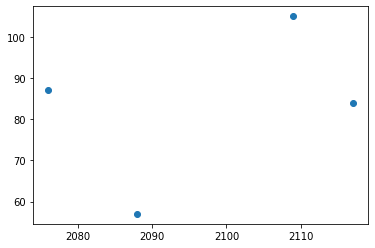

In [19]:

#convert pixels in image into coordinates in an array
xv, yv = np.meshgrid(np.arange(0,w,1), np.arange(0,h,1))

#turn polygon roi into a path and see which pixels are inside of it
all_roi_coordinates = []
all_roi_paths = []
all_roi_masks = []
for roi_index in range(len(all_poly_x)):
    x = all_poly_x[roi_index]
    y = all_poly_y[roi_index]
    roi_coordinates = list(zip(x,y))
    print(roi_coordinates)
    all_roi_coordinates.append(roi_coordinates)
    ### NEED TO ADD LIGHT too, rectangle shape

    #convert poly coords to path
    #for poly_point_index in range(len(x)): #some polygons are 4 or 5 vertices
    roi_path = path.Path(roi_coordinates)
    all_roi_paths.append(roi_path)
    roi_mask = np.where(roi_path.contains_points(np.hstack((xv.flatten()[:,np.newaxis],yv.flatten()[:,np.newaxis]))))
    all_roi_masks.append(roi_mask)  

#rough check of last roi
plt.scatter(x,y)

NameError: name 'all_frames' is not defined

<Figure size 432x288 with 0 Axes>

In [22]:

### FOR VID TEST
first_intensities = []
frame_count = 1
for i in range(10):
    success, frame = cap.read()
    if success:
        frame_count += 1
        flat_frame = frame.flatten()
        #get averages for all ROI in one list
        all_roi_avg_intensity_per_frame = []
        for roi_index in range(len(all_roi_masks)):
            avg_intensity_each_roi = np.mean(flat_frame[all_roi_masks[roi_index]])
            all_roi_avg_intensity_per_frame.append(avg_intensity_each_roi)
        first_intensities.append(all_roi_avg_intensity_per_frame)
    else:
        break

    
print(first_intensities)



fig = plt.figure()
plt.imshow(frame)
for i in range(len(all_poly_x)):
    plt.scatter(all_poly_x[i], all_poly_y[i], color = 'red', s = 2 )
plt.show()
print(all_poly_name)
fig.savefig(os.path.join(save_path, 'video_' + str(video_number) + '_ROI_image.png'))


[[234.47353603603602, 236.45407503234154, 230.37576821773484, 128.90079016681298, 134.12468827930175, 118.39273552780931, 153.73019271948607, 81.8974358974359, 121.97215777262181, 192.28048780487805, 94.5326688815061, 121.04162102957284, 239.41304347826087, 188.61789600967353, 238.91503823279524, 239.81270627062707, 237.30735551663747, 240.26434195725534, 237.86338028169016, 235.15761589403974, 232.35276679841897], [234.48634572072072, 236.48641655886158, 230.35381913959614, 128.85338015803336, 133.9438902743142, 118.39273552780931, 153.6745182012848, 81.8840579710145, 121.66589327146171, 192.5121951219512, 94.10188261351053, 120.76122672508215, 239.97146739130434, 188.54413542926238, 238.77400169923536, 239.70792079207922, 237.03940455341507, 240.2103487064117, 237.94788732394366, 235.14172185430465, 232.29249011857706], [234.48634572072072, 236.46054333764553, 230.35469710272167, 128.89815627743636, 134.0149625935162, 118.39273552780931, 153.67130620985012, 81.8840579710145, 121.9559

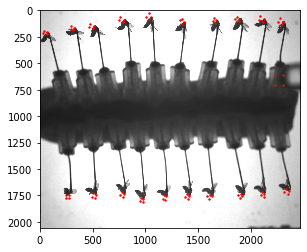

['Light', 'PER', 'PER10', 'PER11', 'PER12', 'PER13', 'PER14', 'PER15', 'PER16', 'PER17', 'PER18', 'PER19', 'PER2', 'PER20', 'PER3', 'PER4', 'PER5', 'PER6', 'PER7', 'PER8', 'PER9']


In [27]:
fig = plt.figure()
plt.imshow(frame)
for i in range(len(all_poly_x)):
    plt.scatter(all_poly_x[i], all_poly_y[i], color = 'red', s = 2 )
plt.show()
print(all_poly_name)
fig.savefig(os.path.join(save_path, 'video_' + str(video_number) + '_ROI_image.png'))

In [ ]:
%%time
#cannot store all the data at once so 
#open each frame-find the itnensity in the ROI 
#and save the average intensity for each frame
all_avg_intensity = []
frame_count = 1
while True: 
    clear_output(wait = True)
    success, frame = cap.read()
    if success:
        frame_count += 1
        flat_frame = frame.flatten()
        #get averages for all ROI in one list
        all_roi_avg_intensity_per_frame = []
        for roi_index in range(len(all_roi_masks)):
            avg_intensity_each_roi = np.mean(flat_frame[all_roi_masks[roi_index]])
            all_roi_avg_intensity_per_frame.append(avg_intensity_each_roi)
        all_avg_intensity.append(all_roi_avg_intensity_per_frame)
    else:
        break
        

    
    #to get percent complete
    #print("Current progress: ", np.round(jpeg_index/len(jpeg_file_names) *100, 2), "%")
    print("Current frame #: ", frame_count)
        

Current frame #:  8736


In [ ]:
#get images of the last frame for each ROI to verify ok
'''
        rectangle dimensions for the ROI around the blink light
        x1,y1 ------
        |          |
        |          |
        |          |
        --------x2,y2

        '''
print(np.shape(all_poly_y))
print(all_poly_y[0])
plt.imshow(frame)
plt.show()
for i in range(len(all_poly_x)):
    if all_poly_name[i] == 'Light':
        #CROPPING THIS WAY ONLY WORKS FOR RECTANGLES
        #to crop frame[y1:y2, x1:x2]
        #polygon arrangement in poly_x and poly_y (x2, x2, x1, x1) (y2, y1, y1, y2)
        y1 = all_poly_y[i][3]
        y2 = all_poly_y[i][1]
        x1 = all_poly_x[i][3]
        x2 = all_poly_x[i][1]
        print('light')
        y1 = min(all_poly_y[i])  #y axis is opposite of what expect 0 is top
        y2 = max(all_poly_y[i])
        x1 = min(all_poly_x[i])
        x2 = max(all_poly_x[i])
        print(y1, y2, x1, x2)
        cropped_frame = frame[y1:y2, x1:x2]
        #cropped_frame = frame[0:300, 0:100]
        plt.imshow(cropped_frame)
        plt.show()
        plt.scatter(all_poly_x[i], all_poly_y[i], color = 'red', s = 2 )
        plt.show()
    else:
        y1 = min(all_poly_y[i])  #y axis is opposite of what expect 0 is top
        y2 = max(all_poly_y[i])
        x1 = min(all_poly_x[i])
        x2 = max(all_poly_x[i])
        
        print(y1, y2, x1, x2)
#         plt.imshow(frame)
#         plt.scatter(x1, y1, color = 'red')
#         plt.scatter(x2, y2, color = 'white')
        cropped_frame = frame[y1:y2, x1:x2]
        plt.imshow(cropped_frame)
        plt.show()
        plt.scatter(all_poly_x[i], all_poly_y[i], color = 'red', s = 2 ) #to see actual shape
        plt.show()
#     fig1.savefig(savepath + '_croppedLED.png')
#     plt.close()

print(all_name_for_header)
print(np.shape(all_avg_intensity[:0]))
print(all_avg_intensity[0:2])
plt.scatter(range(len(all_avg_intensity[:0])), all_avg_intensity[:0])

In [1]:
#save results 
#want the format to be the same as the fiji format so I don't have to change my other code
#format for fiji is row 1 [blank(col of frame numbers), Label, Mean(PER), Mean(PER2), etc]
print(all_name_for_header)
header = all_name_for_header
# if 'Label' not in header: #prevents accidentally adding too many times
#     header.insert(0,'Label')
# print(header)


with open(os.path.join(save_path, str(save_file_name)), 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(header)
    for frame_i in range(len(all_avg_intensity)):
        writer.writerow(all_avg_intensity[frame_i])

NameError: name 'all_name_for_header' is not defined

In [ ]:
print(end)

In [ ]:
# #1. import image
# # open the video and get some basic info
# vidPath = "F:/PER2/07162019/Video_1_Basler acA2440-35um (22467982)_20190716_104524163.avi"
# cap = cv2.VideoCapture(vidPath)

# # Check if opened successfully
# if (cap.isOpened() is False):
#     print('Error opening video stream or file for: ' + assayName)
#     print("Error opening video stream or file") #, file=f)
#     ee = open(assayName + '_errorFile.txt', 'w')
#     ee.write('Error opening video stream or file.')
#     ee.close()
# else:
#     print('vid opened successfully') #, file=f)

# # how many frames in video?
# nFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# print('# of frames in video: %d ' % nFrames) #, file=f)

# # read frame-by-frame
# success, image_frame = cap.read()
# print('read 1st frame: ' + str(success)) #, file=f)


# # frame size
# h, w, _ = np.shape(image_frame)
# print(np.shape(image_frame))
# print('height: %d ' % h) #, file=f)
# print('width: %d ' % w) #, file=f)

In [ ]:
# #convert pixels in image into coordinates in an array
# #print(image_frame)
# # pixel_coords = np.meshgrid(np.linspace(0,w,1), np.linspace(0,h,1))
# # pixel_coords = np.meshgrid(np.linspace(0,w,w), np.linspace(0,h,h))
# xv, yv = np.meshgrid(np.arange(0,w,1), np.arange(0,h,1))
# print(np.shape(xv))
# print(np.shape(yv))
# print(xv[0])

In [ ]:
# #turn my polygon roi into a path and see which pixels are inside of it
# # x = [10,30,40,30]
# # y = [1,3,5,9]
# x = all_poly_x[1]
# y = all_poly_y[1]
# roi1 = list(zip(x,y))
# print(roi1)
# print(roi1[0])

# roi1_poly = path.Path([roi1[0], roi1[1], roi1[2], roi1[3]])
# roi1_mask = np.where(roi1_poly.contains_points(np.hstack((xv.flatten()[:,np.newaxis],yv.flatten()[:,np.newaxis]))))

# print(np.shape(roi1_mask))
# plt.scatter(x,y)



In [ ]:
# print(all_poly_name[1])
# plt.imshow(image_frame)
# plt.scatter(x,y)
# fig1 = plt.gcf()
# plt.show()

In [ ]:
# #use mask to get mean intensity of roi1 region
# image_frame_flat = image_frame.flatten()
# avg_intensity = np.mean(image_frame_flat[roi1_mask])

# print(avg_intensity)
# print(image_frame[roi1_mask])



In [ ]:
# print(np.shape(image_frame))

# test_image = (image_frame[3:6,100:103][0])
# print(test_image)
# print(np.shape(test_image))

# a = np.array([1,30,100])
# test_image = np.array([a,a,a])

# print(test_image)


# xv,yv = np.meshgrid(np.arange(0,3,1), np.arange(0,3,1))

# # test_image_coord = np.vstack((xv.flatten(), yv.flatten()))
# # print(test_image_coord)
# # test_image_coord = np.hstack((xv.flatten()[:,np.newaxis], yv.flatten()[:,np.newaxis]))
# # print(test_image_coord)
# test_image_coord = np.stack((xv.flatten(), yv.flatten())).T
# print(test_image_coord)

# #fake_image_coord = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]

# test_poly = path.Path([(0,0), (2,2), (0,2)]) #upper right triangle
# #test_poly = path.Path([(0,0), (2,2), (2,0)]) 

# test_mask_coords = np.where(test_poly.contains_points(test_image_coord))
# # print('test_mask_coords', test_mask_coords)
# # coord_mask = (test_image_coord[test_mask_coords])
# # print(coord_mask)
# test_image = test_image.flatten()
# print(test_image)
# test_intensity = np.sum(test_image[test_mask_coords])
# print(test_intensity)
# print(np.sum(test_image))

# x = [0,2,0]
# y = [0,2,2]
# plt.scatter(x,y)